In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc

glucose          0
bloodpressure    0
diabetes         0
dtype: int64
Mean train score: 92.588
Mean test score: 88.462


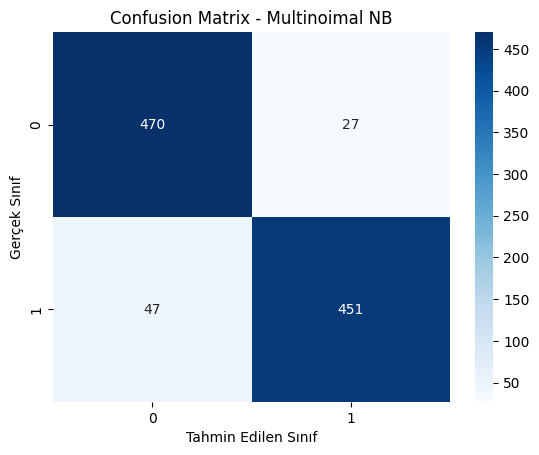

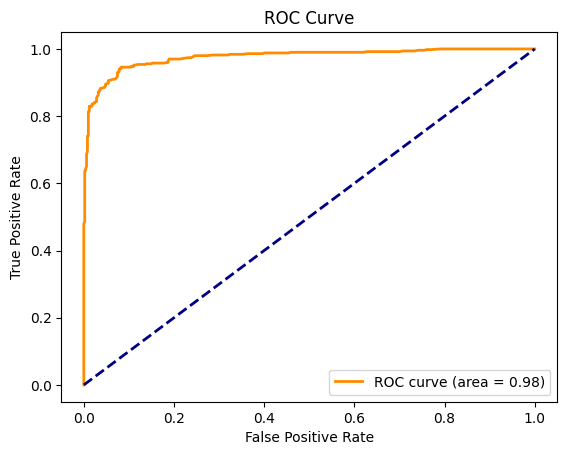

In [55]:
# Veri setini yükle
df = pd.read_csv("Naive-Bayes-Classification-Data.csv")
# Eksik değerleri kontrol et
print(df.isnull().sum())
# One-hot encoding işlemi
df = pd.get_dummies(df, columns=['glucose', 'bloodpressure'])
# Bağımsız ve bağımlı değişkenleri ayır
X = df.drop(['diabetes'], axis=1)
y = df['diabetes']
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
# Veriyi ölçeklendirme
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
multinomial_nb = MultinomialNB()
multinomial_nb.fit(x_train_scaled, y_train)
multinomial_cv = cross_validate(estimator=multinomial_nb,
                                X=x_valid_scaled, y=y_valid,
                                cv=5, return_train_score=True)

multinomial_mean_train_score = round((multinomial_cv['train_score'] * 100).mean(), 3)
multinomial_mean_test_score = round((multinomial_cv['test_score'] * 100).mean(), 3)
print(f'Mean train score: {multinomial_mean_train_score}')
print(f'Mean test score: {multinomial_mean_test_score}')
multinomial_nb_pred = cross_val_predict(multinomial_nb, X, y, cv=5)
cm = confusion_matrix(y, multinomial_nb_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix - Multinoimal NB')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()
multinoimal_nb_pred_prob = cross_val_predict(multinomial_nb, X, y, cv=5, method='predict_proba')
multinoimal_nb_pred_prob = multinoimal_nb_pred_prob[:, 1]
# ROC eğrisini hesapla
fpr, tpr, thresholds = roc_curve(y, multinoimal_nb_pred_prob)
roc_auc = auc(fpr, tpr)
# ROC eğrisini çiz
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

glucose          0
bloodpressure    0
diabetes         0
dtype: int64
Mean train score: 91.457
Mean test score: 90.449


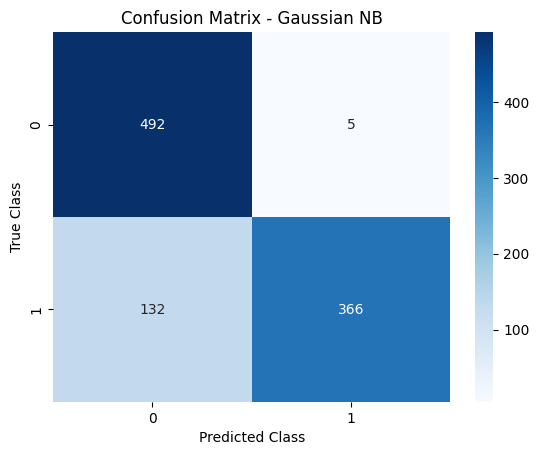

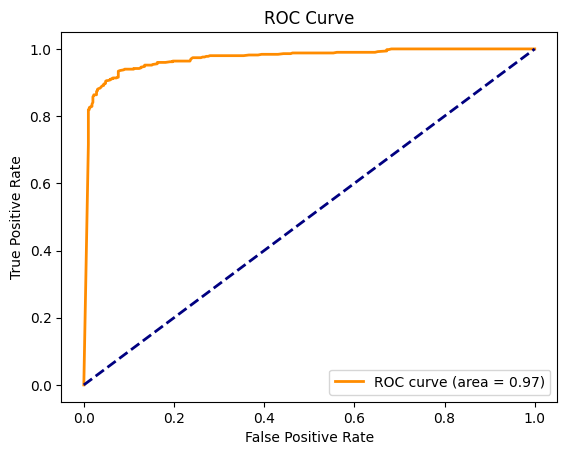

In [56]:
# Load the dataset
df = pd.read_csv("Naive-Bayes-Classification-Data.csv")

# Check for missing values
print(df.isnull().sum())

# One-hot encoding
df = pd.get_dummies(df, columns=['glucose', 'bloodpressure'])

# Separate the independent and dependent variables
X = df.drop(['diabetes'], axis=1)
y = df['diabetes']

# Split the data into training and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)

# Train the Gaussian Naive Bayes model
gaussian_nb = GaussianNB()
gaussian_nb.fit(x_train_scaled, y_train)

# Cross-validation
gaussian_cv = cross_validate(estimator=gaussian_nb, X=x_valid_scaled, y=y_valid, cv=5, return_train_score=True)
gaussian_mean_train_score = round((gaussian_cv['train_score'] * 100).mean(), 3)
gaussian_mean_test_score = round((gaussian_cv['test_score'] * 100).mean(), 3)
print(f'Mean train score: {gaussian_mean_train_score}')
print(f'Mean test score: {gaussian_mean_test_score}')

# Make predictions and calculate the confusion matrix
gaussian_nb_pred = cross_val_predict(gaussian_nb, X, y, cv=5)
cm = confusion_matrix(y, gaussian_nb_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix - Gaussian NB')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# ROC curve
gaussian_nb_pred_prob = cross_val_predict(gaussian_nb, X, y, cv=5, method='predict_proba')
gaussian_nb_pred_prob = gaussian_nb_pred_prob[:, 1]
fpr, tpr, thresholds = roc_curve(y, gaussian_nb_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

glucose          0
bloodpressure    0
diabetes         0
dtype: int64
Mean train score: 92.338
Mean test score: 87.962


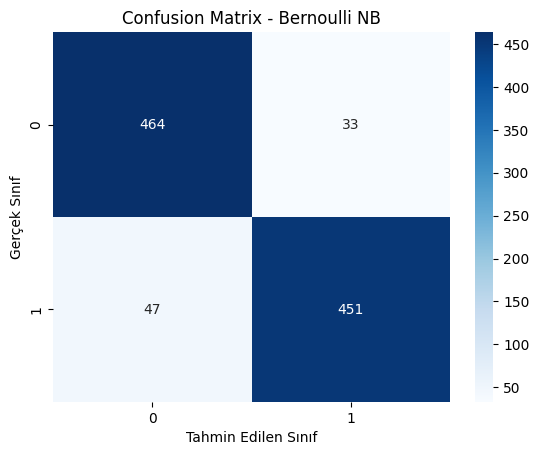

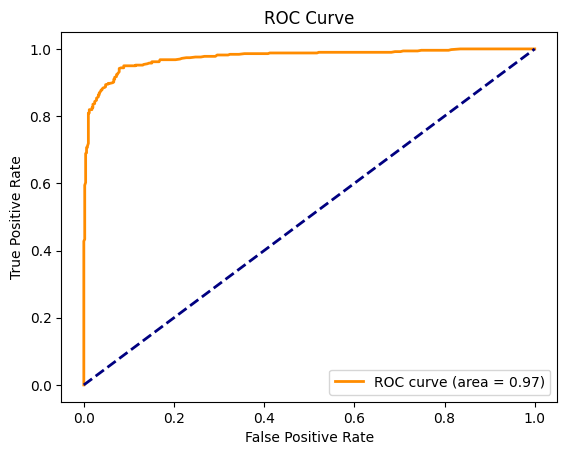

In [58]:
# Veri setini yükle
df = pd.read_csv("Naive-Bayes-Classification-Data.csv")

# Eksik değerleri kontrol et
print(df.isnull().sum())

# One-hot encoding işlemi
df = pd.get_dummies(df, columns=['glucose', 'bloodpressure'])

# Bağımsız ve bağımlı değişkenleri ayır
X = df.drop(['diabetes'], axis=1)
y = df['diabetes']
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendirme
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)

# BernoulliNB modelini eğit ve test et
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(x_train_scaled, y_train)
bernoulli_cv = cross_validate(estimator=bernoulli_nb,
                              X=x_valid_scaled, y=y_valid,
                              cv=5, return_train_score=True)

bernoulli_mean_train_score = round((bernoulli_cv['train_score'] * 100).mean(), 3)
bernoulli_mean_test_score = round((bernoulli_cv['test_score'] * 100).mean(), 3)
print(f'Mean train score: {bernoulli_mean_train_score}')
print(f'Mean test score: {bernoulli_mean_test_score}')

# BernoulliNB modeli ile tahmin yap ve sonuçları değerlendir
bernoulli_nb_pred = cross_val_predict(bernoulli_nb, X, y, cv=5)
cm = confusion_matrix(y, bernoulli_nb_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix - Bernoulli NB')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

# BernoulliNB modeli ile olasılık hesapla ve ROC eğrisini çiz
bernoulli_nb_pred_prob = cross_val_predict(bernoulli_nb, X, y, cv=5, method='predict_proba')
bernoulli_nb_pred_prob = bernoulli_nb_pred_prob[:, 1]

fpr, tpr, thresholds = roc_curve(y, bernoulli_nb_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

glucose          0
bloodpressure    0
diabetes         0
dtype: int64
Mean train score: 91.961
Mean test score: 87.962


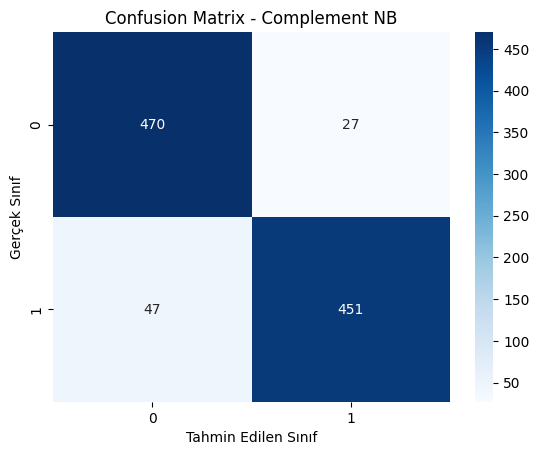

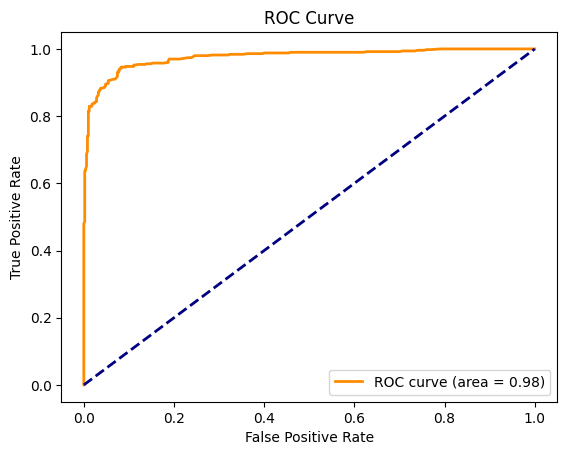

In [59]:
# Veri setini yükle
df = pd.read_csv("Naive-Bayes-Classification-Data.csv")

# Eksik değerleri kontrol et
print(df.isnull().sum())

# One-hot encoding işlemi
df = pd.get_dummies(df, columns=['glucose', 'bloodpressure'])

# Bağımsız ve bağımlı değişkenleri ayır
X = df.drop(['diabetes'], axis=1)
y = df['diabetes']
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendirme
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)

# ComplementNB modelini oluşturma ve eğitme
complement_nb = ComplementNB()
complement_nb.fit(x_train_scaled, y_train)

# Cross-validation yapma
complement_cv = cross_validate(estimator=complement_nb, X=x_valid_scaled, y=y_valid,
                               cv=5, return_train_score=True)

# Sonuçları yazdırma
complement_mean_train_score = round((complement_cv['train_score'] * 100).mean(), 3)
complement_mean_test_score = round((complement_cv['test_score'] * 100).mean(), 3)
print(f'Mean train score: {complement_mean_train_score}')
print(f'Mean test score: {complement_mean_test_score}')

# Confusion matrix'i çizme
complement_nb_pred = cross_val_predict(complement_nb, X, y, cv=5)
cm = confusion_matrix(y, complement_nb_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix - Complement NB')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

# ROC eğrisini hesapla
complement_nb_pred_prob = cross_val_predict(complement_nb, X, y, cv=5, method='predict_proba')
complement_nb_pred_prob = complement_nb_pred_prob[:, 1]
fpr, tpr, thresholds = roc_curve(y, complement_nb_pred_prob)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çiz
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

glucose          0
bloodpressure    0
diabetes         0
dtype: int64
Mean train score: 50.276
Mean test score: 49.95


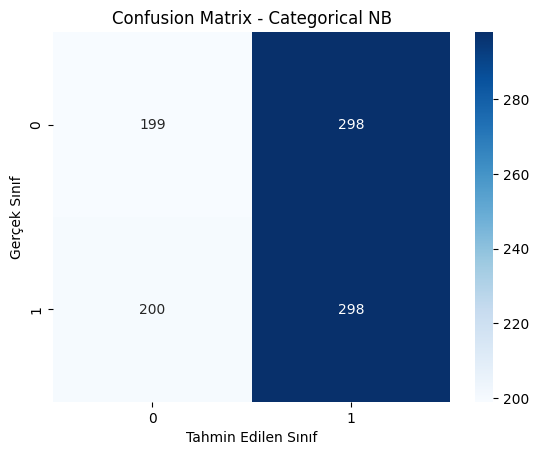

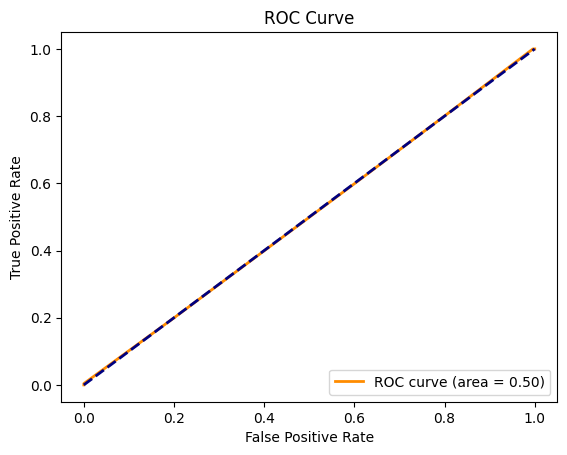

In [60]:
# Veri setini yükle
df = pd.read_csv("Naive-Bayes-Classification-Data.csv")

# Eksik değerleri kontrol et
print(df.isnull().sum())

# Bağımsız ve bağımlı değişkenleri ayır
X = df.drop(['diabetes'], axis=1)
y = df['diabetes']

# Veriyi ölçeklendirme
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# CategoricalNB sınıflandırıcısını kullanarak eğitim yap
categorical_nb = CategoricalNB()
categorical_cv = cross_validate(estimator=categorical_nb, X=X_scaled, y=y,
                                cv=5, return_train_score=True)

categorical_mean_train_score = round((categorical_cv['train_score'] * 100).mean(), 3)
categorical_mean_test_score = round((categorical_cv['test_score'] * 100).mean(), 3)
print(f'Mean train score: {categorical_mean_train_score}')
print(f'Mean test score: {categorical_mean_test_score}')

categorical_nb_pred = cross_val_predict(categorical_nb, X_scaled, y, cv=5)
cm = confusion_matrix(y, categorical_nb_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix - Categorical NB')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

categorical_nb_pred_prob = cross_val_predict(categorical_nb, X_scaled, y, cv=5, method='predict_proba')
categorical_nb_pred_prob = categorical_nb_pred_prob[:, 1]

# ROC eğrisini hesapla
fpr, tpr, thresholds = roc_curve(y, categorical_nb_pred_prob)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çiz
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [61]:
sns.set_theme(style='whitegrid')

<AxesSubplot: >

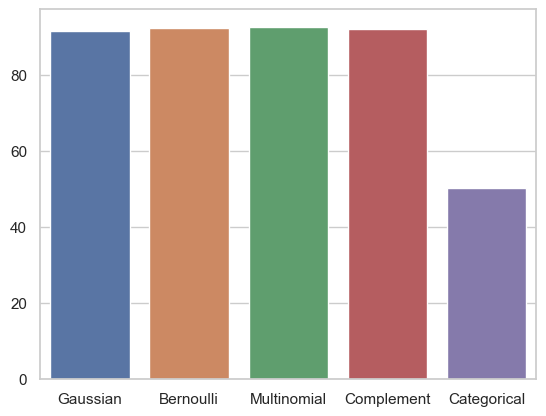

In [64]:
mean_train_scores = pd.DataFrame(
       data=[[gaussian_mean_train_score,
              bernoulli_mean_train_score,
              multinomial_mean_train_score,
              complement_mean_train_score,
              categorical_mean_train_score
              ]],
       columns=['Gaussian', 'Bernoulli', 'Multinomial', 'Complement', 'Categorical'])
sns.barplot(data=mean_train_scores)

<AxesSubplot: >

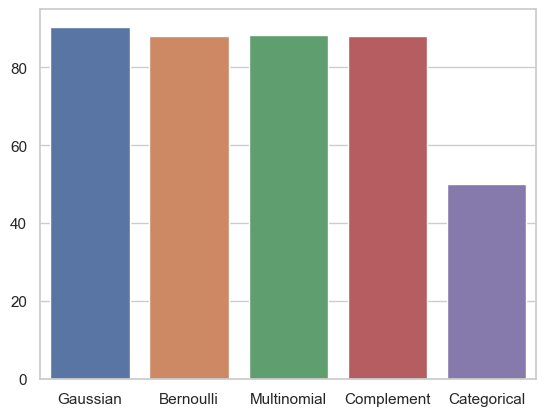

In [65]:
mean_test_scores = pd.DataFrame(data=[[gaussian_mean_test_score,
                                      bernoulli_mean_test_score,
                                      multinomial_mean_test_score,
                                      complement_mean_test_score,
                                      categorical_mean_test_score
                                      ]],
                                columns=['Gaussian', 'Bernoulli', 'Multinomial','Complement','Categorical'])
sns.barplot(data=mean_test_scores)